# Supervisados

In [1]:
!pip install pandas numpy scikit-learn xgboost streamlit joblib matplotlib seaborn


In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


data_test = pd.read_csv('fraudTest2.csv')
data_train = pd.read_csv("fraudTrain2.csv")
data = pd.concat([data_train,data_test])

fraud=data[data["is_fraud"]==1]
not_fraud=data[data["is_fraud"]==0]
not_fraud=not_fraud.sample(fraud.shape[0])
data=pd.concat([fraud,not_fraud])

print(data.head())


categorical_cols = ['merchant', 'category', 'gender', 'state']
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le


data = data.drop(['Unnamed: 0','first','last','unix_time','street','gender','job','dob','city','state','trans_num','merchant','cc_num'], axis=1)

data['trans_date_trans_time']=pd.to_datetime(data['trans_date_trans_time'])
data['trans_day']=data['trans_date_trans_time'].dt.day
data['trans_month']=data['trans_date_trans_time'].dt.month
data['trans_year']=data['trans_date_trans_time'].dt.year
data['trans_hour']=data['trans_date_trans_time'].dt.hour
data['trans_minute']=data['trans_date_trans_time'].dt.minute
data.drop(columns=['trans_date_trans_time'],inplace=True)

encoder=LabelEncoder()
data['category']=encoder.fit_transform(data['category'])
#data['cc_num']=encoder.fit_transform(data['cc_num'])
scaler=StandardScaler()
data['amt']=scaler.fit_transform(data[['amt']])
data['zip']=scaler.fit_transform(data[['zip']])
data['city_pop']=scaler.fit_transform(data[['city_pop']])
#data['cc_num']=encoder.fit_transform(data['cc_num'])
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']


print('Features shape:', X.shape)
print('Target shape:', y.shape)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train distribution:\n', y_train.value_counts())
print('y_test distribution:\n', y_test.value_counts())

      Unnamed: 0 trans_date_trans_time           cc_num  \
2449        2449   2019-01-02 01:06:37    4613314721966   
2472        2472   2019-01-02 01:47:29  340187018810220   
2523        2523   2019-01-02 03:05:23  340187018810220   
2546        2546   2019-01-02 03:38:03    4613314721966   
2553        2553   2019-01-02 03:55:47  340187018810220   

                              merchant       category     amt  first    last  \
2449            fraud_Rutherford-Mertz    grocery_pos  281.06  Jason  Murphy   
2472  fraud_Jenkins, Hauck and Friesen  gas_transport   11.52  Misty    Hart   
2523            fraud_Goodwin-Nitzsche    grocery_pos  276.31  Misty    Hart   
2546            fraud_Erdman-Kertzmann  gas_transport    7.03  Jason  Murphy   
2553                fraud_Koepp-Parker    grocery_pos  275.73  Misty    Hart   

     gender                     street  ...      lat     long  city_pop  \
2449      M  542 Steve Curve Suite 011  ...  35.9946 -81.7266       885   
2472      F  2

# Regresión logística

Regresión logística clasificación:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1931
           1       0.94      0.76      0.84      1930

    accuracy                           0.86      3861
   macro avg       0.87      0.86      0.86      3861
weighted avg       0.87      0.86      0.86      3861



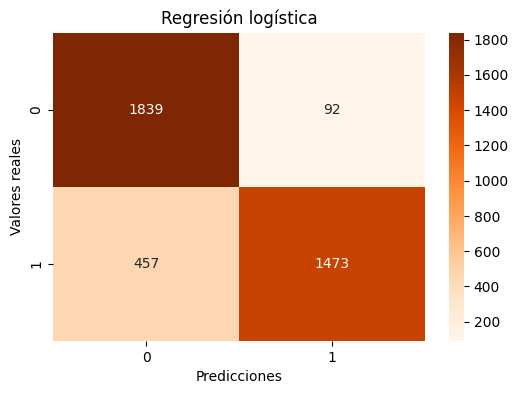

Rgresión logística ROC AUC: 0.8598267160026081


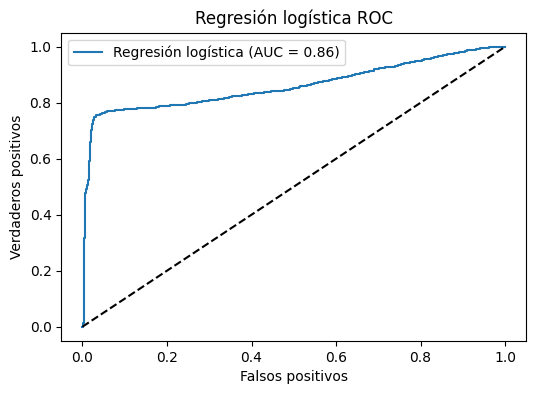

In [13]:
from sklearn.linear_model import LogisticRegression


lr_model = LogisticRegression(max_iter=1000)


lr_model.fit(X_train, y_train)


y_pred_lr = lr_model.predict(X_test)
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]


print('Regresión logística clasificación:')
print(classification_report(y_test, y_pred_lr))


cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Regresión logística')
plt.show()


roc_auc_lr = roc_auc_score(y_test, y_proba_lr)
print('Rgresión logística ROC AUC:', roc_auc_lr)


fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_proba_lr)
plt.figure(figsize=(6, 4))
plt.plot(fpr_lr, tpr_lr, label=f'Regresión logística (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Falsos positivos')
plt.ylabel('Verdaderos positivos')
plt.title('Regresión logística ROC')
plt.legend()
plt.show()


# Random Forest

Random Forest Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1931
           1       0.98      0.96      0.97      1930

    accuracy                           0.97      3861
   macro avg       0.97      0.97      0.97      3861
weighted avg       0.97      0.97      0.97      3861



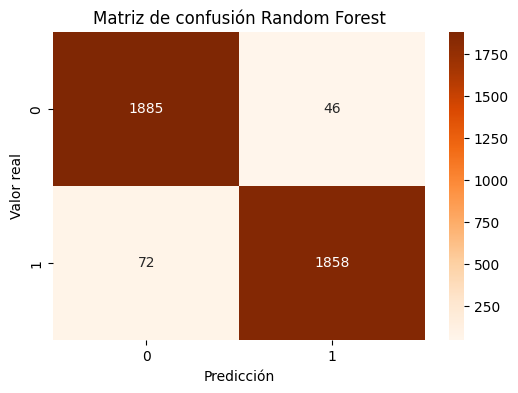

Random Forest ROC AUC: 0.9947126646506548


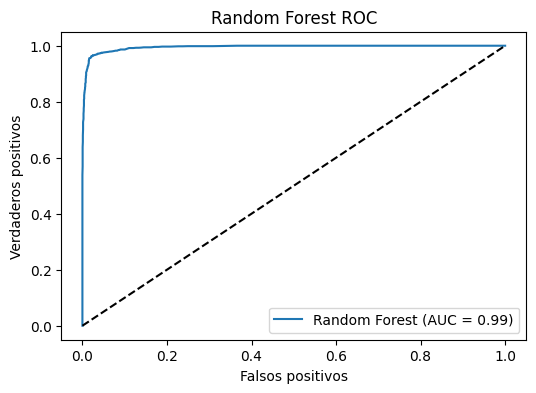

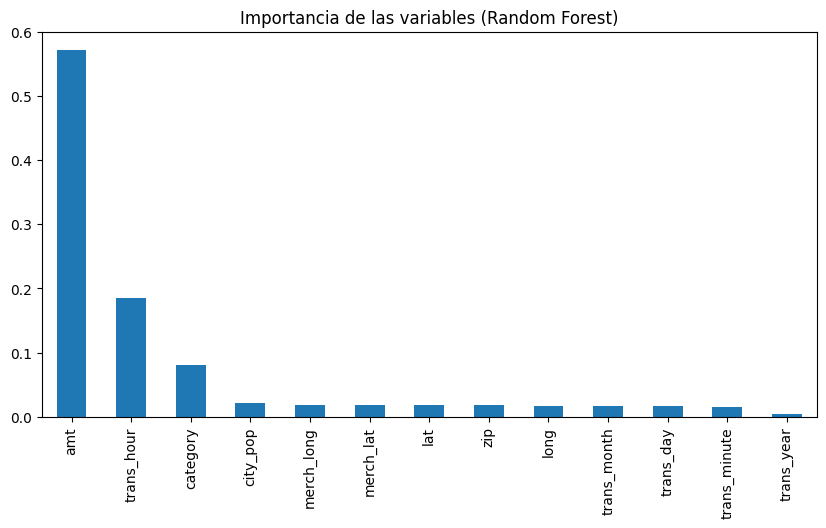

In [14]:

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)


rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]


print('Random Forest Clasificación:')
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de confusión Random Forest')
plt.show()

roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print('Random Forest ROC AUC:', roc_auc_rf)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Falsos positivos')
plt.ylabel('Verdaderos positivos')
plt.title('Random Forest ROC')
plt.legend()
plt.show()

feature_importances = pd.Series(
    rf_model.feature_importances_, 
    index=X_train.columns
).sort_values(ascending=False)

feature_importances.plot(kind='bar', title='Importancia de las variables (Random Forest)', figsize=(10, 5))
plt.show()

XGBoost Clasificación:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1931
           1       0.98      0.98      0.98      1930

    accuracy                           0.98      3861
   macro avg       0.98      0.98      0.98      3861
weighted avg       0.98      0.98      0.98      3861



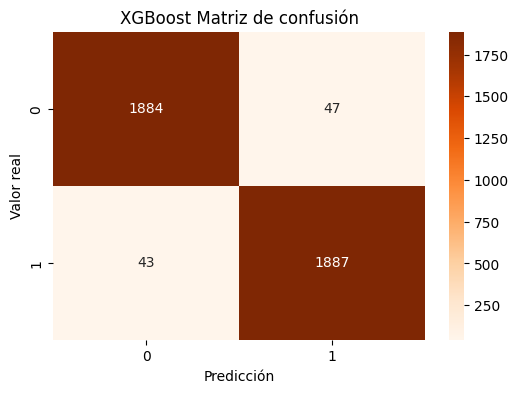

XGBoost ROC AUC: 0.9971544180979547


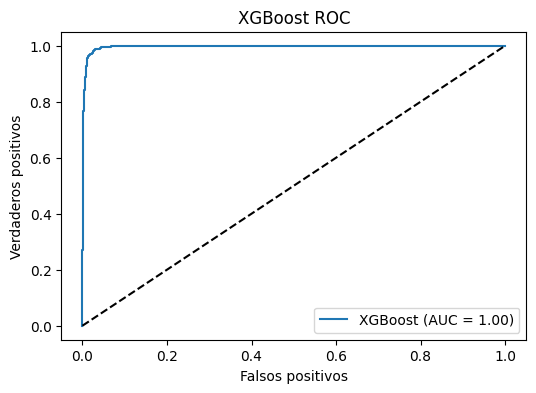

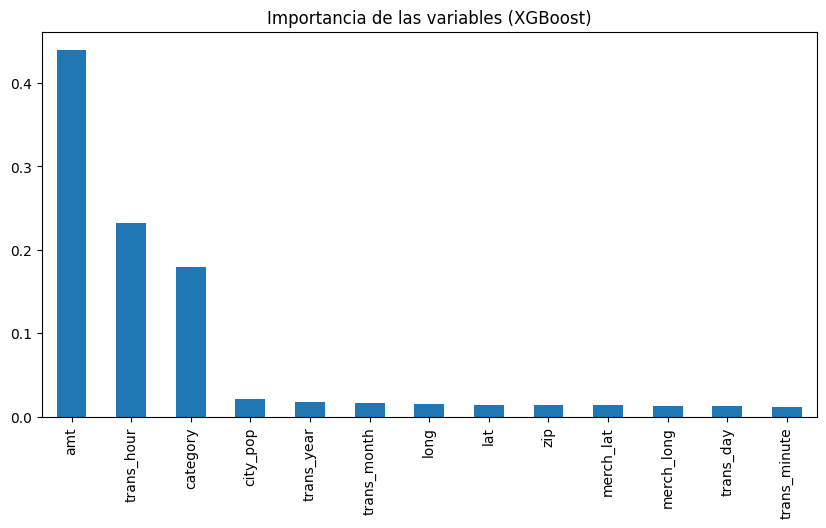

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

xgb_model = XGBClassifier(eval_metric='logloss')


xgb_model.fit(X_train.values, y_train.values)  

y_pred_xgb = xgb_model.predict(X_test.values)
y_proba_xgb = xgb_model.predict_proba(X_test.values)[:, 1]

print('XGBoost Clasificación:')
print(classification_report(y_test, y_pred_xgb))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('XGBoost Matriz de confusión')
plt.show()

roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)
print('XGBoost ROC AUC:', roc_auc_xgb)

fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_proba_xgb)
plt.figure(figsize=(6, 4))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Falsos positivos')
plt.ylabel('Verdaderos positivos')
plt.title('XGBoost ROC')
plt.legend()
plt.show()


feature_importances = pd.Series(
    xgb_model.feature_importances_, 
    index=X_train.columns
).sort_values(ascending=False)

feature_importances.plot(kind='bar', title='Importancia de las variables (XGBoost)', figsize=(10, 5))
plt.show()


# LGBM

[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
LightGBM clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1931
           1       0.97      0.97      0.97      1930

    accuracy                           0.97      3861
   macro avg       0.97      0.97      0.97      3861
weighted avg       0.97      0.97      0.97      3861



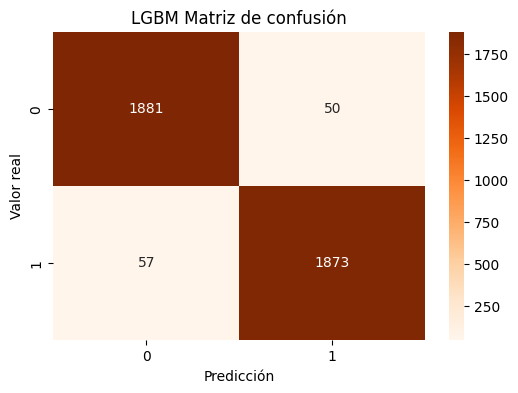

LGBM ROC AUC: 0.9965305635083972


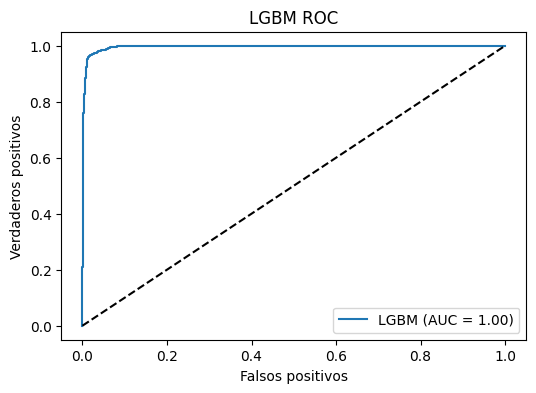

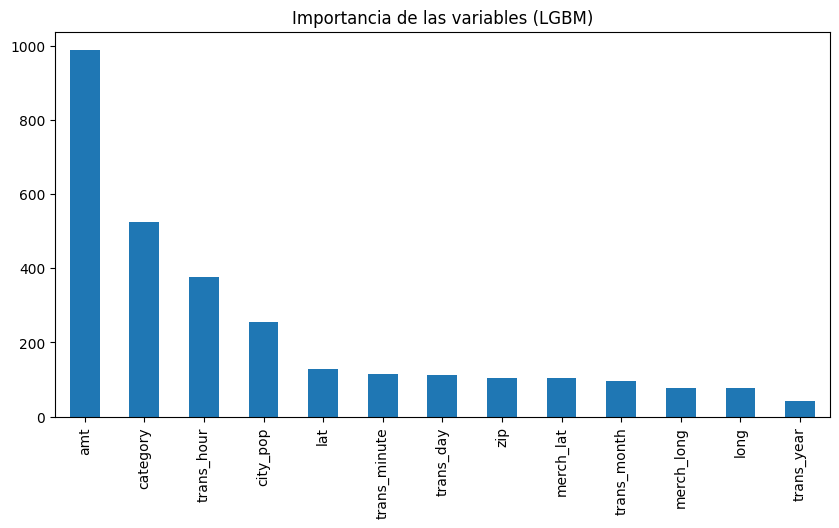

In [16]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(random_state=42,application="binary",min_data_in_leaf=300,max_depth=900)
lgbm_model.fit(X_train.values, y_train.values)
y_pred_lgbm = lgbm_model.predict(X_test.values)
y_proba_lgbm = lgbm_model.predict_proba(X_test.values)[:, 1]
lgbm_predictions = lgbm_model.predict(X_test)

print("LightGBM clasificación:")
print(classification_report(y_test, lgbm_predictions))
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('LGBM Matriz de confusión')
plt.show()


roc_auc_lgbm = roc_auc_score(y_test, y_proba_lgbm)
print('LGBM ROC AUC:', roc_auc_lgbm)


fpr_lgbm, tpr_lgbm, thresholds_xgb = roc_curve(y_test, y_proba_lgbm)
plt.figure(figsize=(6, 4))
plt.plot(fpr_lgbm, tpr_lgbm, label=f'LGBM (AUC = {roc_auc_lgbm:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Falsos positivos')
plt.ylabel('Verdaderos positivos')
plt.title('LGBM ROC')
plt.legend()
plt.show()

feature_importances = pd.Series(
    lgbm_model.feature_importances_, 
    index=X_train.columns
).sort_values(ascending=False)
feature_importances.plot(kind='bar', title='Importancia de las variables (LGBM)', figsize=(10, 5))
plt.show()


# Extra trees

Extra Trees Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1931
           1       0.97      0.94      0.96      1930

    accuracy                           0.96      3861
   macro avg       0.96      0.96      0.96      3861
weighted avg       0.96      0.96      0.96      3861

Matriz de confusión:
[[1876   55]
 [ 108 1822]]


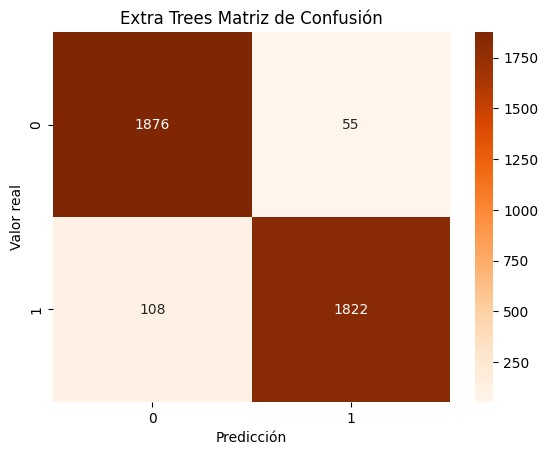

Extra Trees ROC AUC: 0.9880399696256603


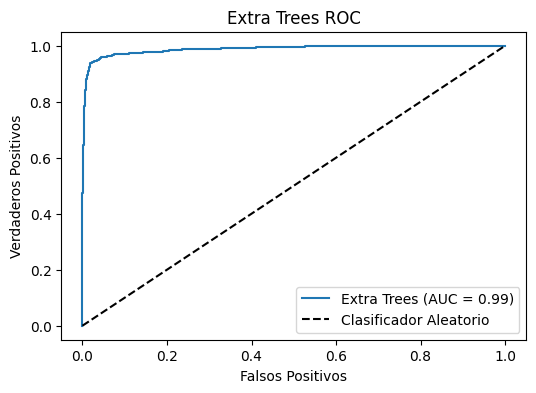

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


extra_trees_model = ExtraTreesClassifier(
    random_state=42, 
    min_samples_leaf=2, 
    min_samples_split=2, 
    class_weight="balanced"
)
extra_trees_model.fit(X_train, y_train)

extra_trees_predictions = extra_trees_model.predict(X_test)
y_proba_extra = extra_trees_model.predict_proba(X_test)[:, 1]

print("Extra Trees Clasificación:")
print(classification_report(y_test, extra_trees_predictions))


cm_extra = confusion_matrix(y_test, extra_trees_predictions)
print("Matriz de confusión:")
print(cm_extra)


sns.heatmap(cm_extra, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Extra Trees Matriz de Confusión')
plt.show()


roc_auc_extra = roc_auc_score(y_test, y_proba_extra)
print('Extra Trees ROC AUC:', roc_auc_extra)

fpr_extra, tpr_extra, thresholds_extra = roc_curve(y_test, y_proba_extra)

plt.figure(figsize=(6, 4))
plt.plot(fpr_extra, tpr_extra, label=f'Extra Trees (AUC = {roc_auc_extra:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Clasificador Aleatorio')
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.title('Extra Trees ROC')
plt.legend()
plt.show()



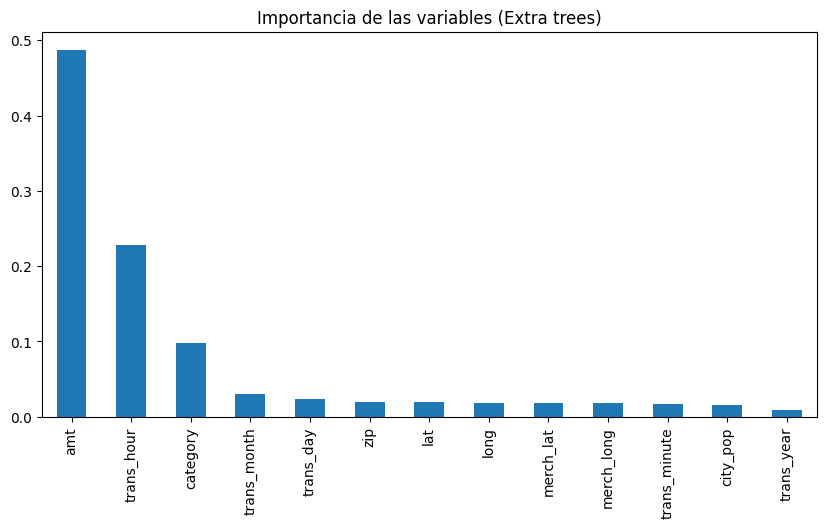

In [18]:
feature_importances = pd.Series(
    extra_trees_model.feature_importances_, 
    index=X_train.columns
).sort_values(ascending=False)

feature_importances.plot(kind='bar', title='Importancia de las variables (Extra trees)', figsize=(10, 5))
plt.show()


Isolation Forest...
Reporte de Isolation Forest:
              precision    recall  f1-score   support

           0       0.56      0.62      0.59      9651
           1       0.57      0.52      0.55      9651

    accuracy                           0.57     19302
   macro avg       0.57      0.57      0.57     19302
weighted avg       0.57      0.57      0.57     19302

One-Class SVM...
Reporte de One-Class SVM:
              precision    recall  f1-score   support

           0       0.60      0.36      0.45      9651
           1       0.54      0.76      0.63      9651

    accuracy                           0.56     19302
   macro avg       0.57      0.56      0.54     19302
weighted avg       0.57      0.56      0.54     19302



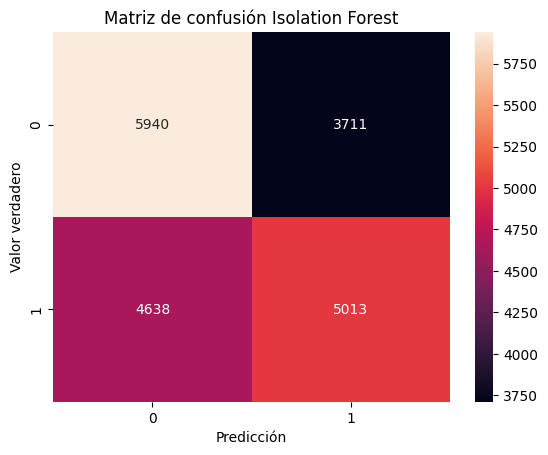

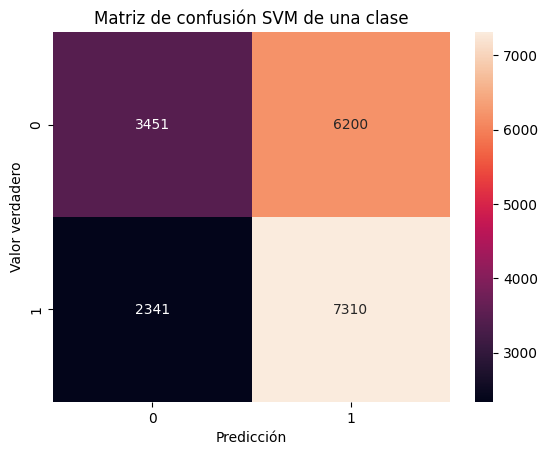

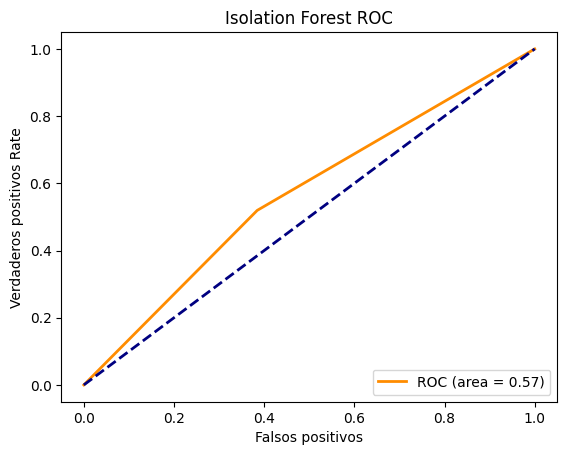

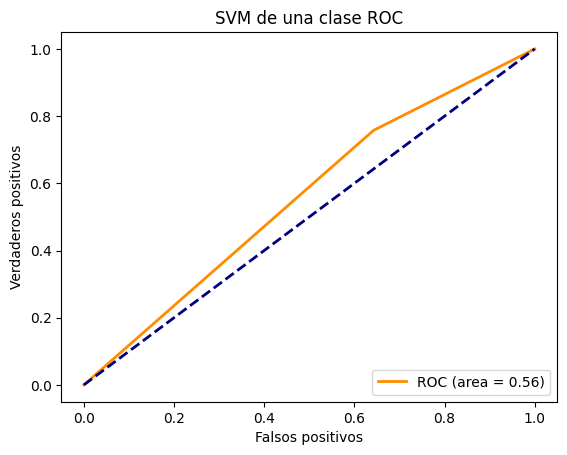

In [20]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM


from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


fraud_train = pd.read_csv('fraudTrain2.csv')
fraud_test = pd.read_csv('fraudTest2.csv')


data = pd.concat([fraud_train, fraud_test], ignore_index=True)

fraud = data[data["is_fraud"] == 1]
not_fraud = data[data["is_fraud"] == 0]


not_fraud = not_fraud.sample(fraud.shape[0], random_state=42)


data = pd.concat([fraud, not_fraud])


data = data.sample(frac=1, random_state=42).reset_index(drop=True)


categorical_cols = ['merchant', 'category', 'gender', 'state', 'city', 'job']
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    encoders[col] = le


data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['trans_day'] = data['trans_date_trans_time'].dt.day
data['trans_month'] = data['trans_date_trans_time'].dt.month
data['trans_year'] = data['trans_date_trans_time'].dt.year
data['trans_hour'] = data['trans_date_trans_time'].dt.hour
data['trans_minute'] = data['trans_date_trans_time'].dt.minute


data = data.drop(['Unnamed: 0', 'first', 'last', 'street', 'dob', 'unix_time',
                  'trans_date_trans_time', 'merchant', 'trans_num','cc_num'], axis=1)


numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = numeric_cols.drop('is_fraud')  
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])


X = data.drop('is_fraud', axis=1)
y = data['is_fraud']


print("Isolation Forest...")
iso_forest = IsolationForest(n_estimators=300, contamination='auto', random_state=42)
iso_forest.fit(X)
y_pred_iso = iso_forest.predict(X)

y_pred_iso = [1 if x == -1 else 0 for x in y_pred_iso]


print("Reporte de Isolation Forest:")
print(classification_report(y, y_pred_iso))


print("One-Class SVM...")
oc_svm = OneClassSVM(kernel='rbf', gamma='scale', nu=0.7)
oc_svm.fit(X)
y_pred_svm = oc_svm.predict(X)

y_pred_svm = [1 if x == -1 else 0 for x in y_pred_svm]


print("Reporte de One-Class SVM:")
print(classification_report(y, y_pred_svm))


cm_iso = confusion_matrix(y, y_pred_iso)
sns.heatmap(cm_iso, annot=True, fmt='d')
plt.title('Matriz de confusión Isolation Forest')
plt.xlabel('Predicción')
plt.ylabel('Valor verdadero')
plt.show()


cm_svm = confusion_matrix(y, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d')
plt.title('Matriz de confusión SVM de una clase')
plt.xlabel('Predicción')
plt.ylabel('Valor verdadero')
plt.show()


fpr_iso, tpr_iso, thresholds_iso = roc_curve(y, y_pred_iso)
roc_auc_iso = auc(fpr_iso, tpr_iso)

plt.figure()
plt.plot(fpr_iso, tpr_iso, color='darkorange', lw=2,
         label='ROC (area = %0.2f)' % roc_auc_iso)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Isolation Forest ROC')
plt.xlabel('Falsos positivos')
plt.ylabel('Verdaderos positivos Rate')
plt.legend(loc="lower right")
plt.show()


fpr_svm, tpr_svm, thresholds_svm = roc_curve(y, y_pred_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2,
         label='ROC (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('SVM de una clase ROC')
plt.xlabel('Falsos positivos')
plt.ylabel('Verdaderos positivos')
plt.legend(loc="lower right")
plt.show()


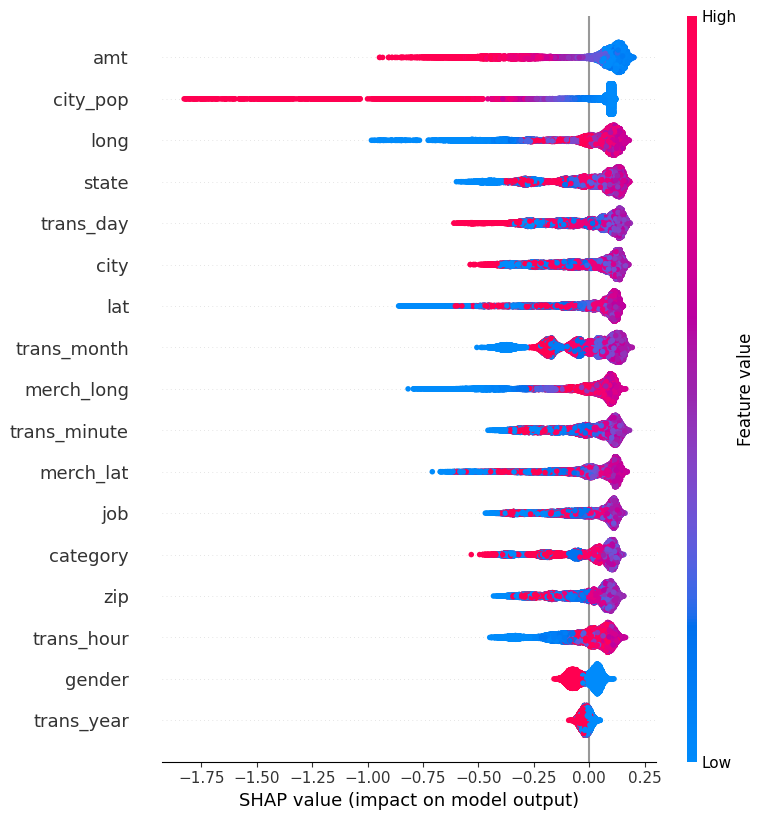

In [21]:
import shap
explainer=shap.TreeExplainer(iso_forest)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

In [10]:
import shap
explainer = shap.KernelExplainer(oc_svm.decision_function, X)
shap_values = explainer.shap_values(X, nsamples=100)
shap.summary_plot(shap_values, X)


ModuleNotFoundError: No module named 'shap'